In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import mglearn

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [2]:
# Carregando os dados da cancer
cancer_dataset = load_breast_cancer() 

In [3]:
# Separando treino e teste, 75% e 25% respectivamente
X_train, X_test, y_train, y_test = train_test_split(
    cancer_dataset['data'], cancer_dataset['target'], random_state=42)

In [4]:
# Criando o dataset do treino
cancer_dataframe = pd.DataFrame(X_train, columns=cancer_dataset.feature_names)
cancer_dataframe

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,12.890,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.620,15.54,87.40,577.0,0.09616,0.11470,0.11860,0.05366,0.2309,0.06915
1,13.400,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,0.07325,...,16.410,29.66,113.30,844.4,0.15740,0.38560,0.51060,0.20510,0.3585,0.11090
2,12.960,18.29,84.18,525.2,0.07351,0.07899,0.04057,0.01883,0.1874,0.05899,...,14.130,24.61,96.31,621.9,0.09329,0.23180,0.16040,0.06608,0.3207,0.07247
3,17.750,28.03,117.30,981.6,0.09997,0.13140,0.16980,0.08293,0.1713,0.05916,...,21.530,38.54,145.40,1437.0,0.14010,0.37620,0.63990,0.19700,0.2972,0.09075
4,20.580,22.14,134.70,1290.0,0.09090,0.13480,0.16400,0.09561,0.1765,0.05024,...,23.240,27.84,158.30,1656.0,0.11780,0.29200,0.38610,0.19200,0.2909,0.05865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,...,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
422,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
423,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
424,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544,...,17.040,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550


# Modelo DecisionTree

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
# Carreando o modelo e treinando
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [7]:
# Predizendo os valores testes
y_pred = tree.predict(X_test) 
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [1 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0
 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1]


In [8]:
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.930


## Melhorando o modelo

In [9]:
# denindo limite de profundidade de folhas, diminiuindo complexidade da árvore 
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [10]:
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.995
Accuracy on test set: 0.951


# Visualizando a árvore de decisão

In [11]:
from sklearn.tree import export_graphviz
import graphviz

In [14]:
export_graphviz(tree, out_file="data/tree.dot", class_names=["malignant", "benign"],
 feature_names=cancer_dataset.feature_names, impurity=False, filled=True)

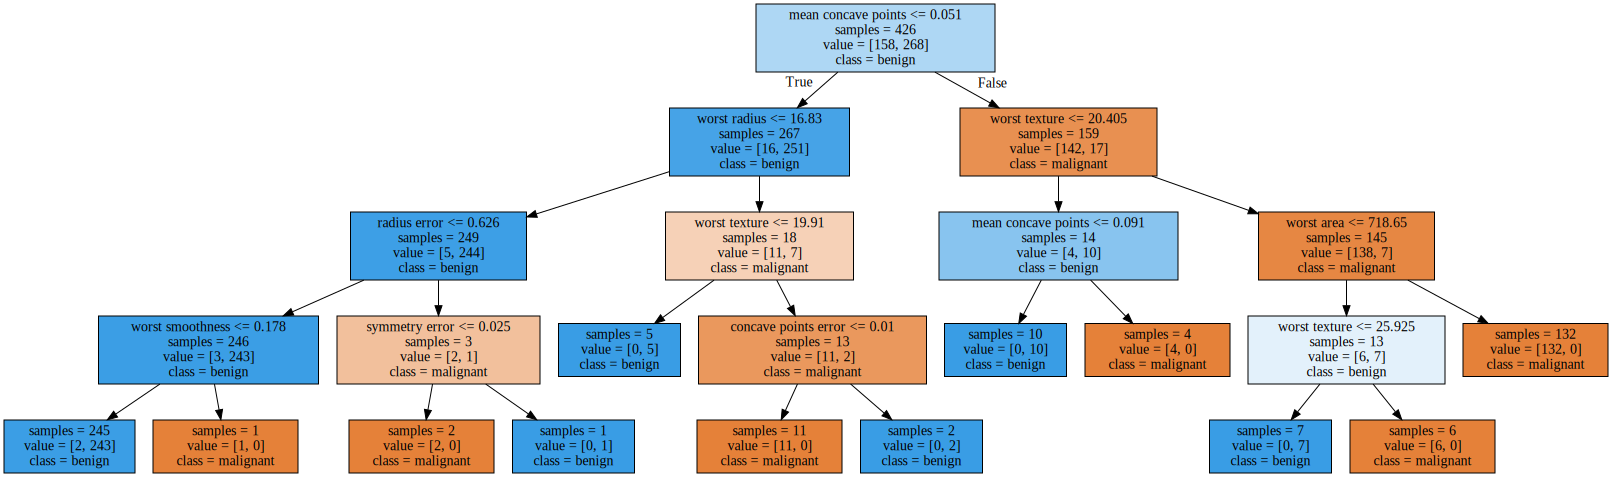

In [15]:
with open("data/tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances: [0. 1.]


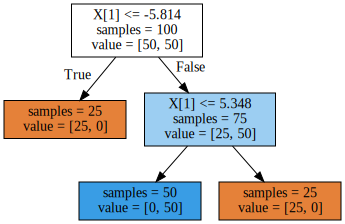

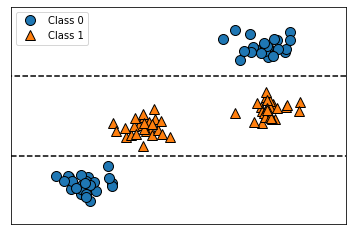

In [16]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)